## Data specification

Wine Quality Data Set[1] used in this assignment was downloaded from UCI machine learning data sets( https://archive.ics.uci.edu/ml/datasets/Wine+Quality). Two datasets were included. File winequality-red.csv cantains red wine preference samples and file winequality-white.csv contains white wine preference samples. Datasets are related to "Vinho Verde" (green wine) which originated in Miho province in Portugal. Wine Quality Data set were collected by P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. The data were collected from May/2004 to February/2007 using only protected designation of origin samples that were tested at the official certification entity (CVRVV). The CVRVV is an inter-professional organization with the goal of improving the quality and marketing of vinho verde. The data were recorded by a computerized system (iLab), which automatically manages the process of wine sample testing from producer requests to laboratory and sensory analysis. Each entry denotes a given test (analytical or sensory) and the final database was exported into a single sheet (.csv).

The data set was read in. 

In [1]:
import pandas as pd
red_wine = pd.read_csv('winequality-red.csv', sep = ';')
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In this project, the red wine dataset was chosen to be analyzed. 12 columns contained in the red wine data set are           
- Input X:       
    - fixed acidity (tartaric acid - $g/dm^{3}$)
    - volatile acidity (acetic acid - $g/dm^{3}$)
    - citric acid ($g/dm^{3}$)
    - residual sugar ($g/dm^{3}$)
    - chlorides (sodium chloride - $g/dm^{3}$)
    - free sulfur dioxide ($mg/dm^{3}$)
    - total sulfur dioxide ($mg/dm^{3}$)
    - density ($g/dm^{3}$)
    - pH
    - sulphates (potassium sulphate - $g/dm^{3}$)
    - alcohol (% by volume)   
All input X:s (based on physicochemical tests) are numerical continuous data          
- Target Y:       
    - quality : A integer between 0 and 10          
Target Y (based on sensory data) is categorical ordinal data. 

The data was cleaned before data analysis. 

In [2]:
red_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

The dataset does not contain null value. However, it contains 240 duplicated data points. These duplicated data points were removed. Data without duplicated data points were stored in a new data frame with name red_wine_clean.

In [3]:
red_wine.duplicated().sum()

240

We remove these duplicated data points.

In [4]:
red_wine_clean = red_wine.drop_duplicates()
red_wine_clean.duplicated().sum()

0

## Perform Q-Q plot to show the relationship between training and validation data set
Data was splited into training set (60%), testing set (20%) and validation set (20%). 

In [5]:
# Split original DataFrame into training and testing_validation sets
training = red_wine_clean.sample(frac=0.6,random_state=0)
testing_validation = red_wine_clean.drop(training.index)
# Split testing_validation into testing and validation sets
testing = testing_validation.sample(frac=0.5,random_state=0)
validation = testing_validation.drop(testing.index)

pH, citric acid and fixed acidity from training and validation set were chosen to show the relations by Q-Q plot. 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
def my_qqplot(data1, data2):
    ls1 = sorted([np.percentile(data1, i) for i in np.linspace(1, 100, 500)])
    ls2 = sorted([np.percentile(data2, i) for i in np.linspace(1, 100, 500)])
    sns.regplot(x=pd.Series(ls1), y=pd.Series(ls2), ci=None, color='b', line_kws={'color':'r'})
    plt.xlabel('training data')
    plt.ylabel('validation data')
    plt.show()

Chart 1: Q-Q plot for training data set and validation data set for pH value column. 
Data points at both ends deviate from the 45-degree line


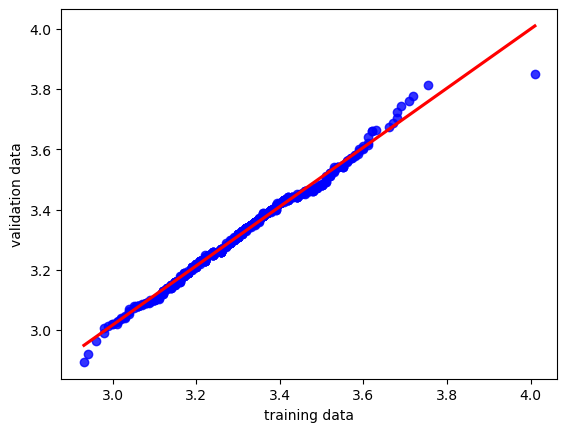

In [7]:
print('''Chart 1: Q-Q plot for training data set and validation data set for pH value column. 
Data points at both ends deviate from the 45-degree line''')
my_qqplot(training.pH, validation.pH)

Chart 2: Q-Q plot for training data set and validation data set for citric acid column. 
Not all data points fall on the 45 degree line.


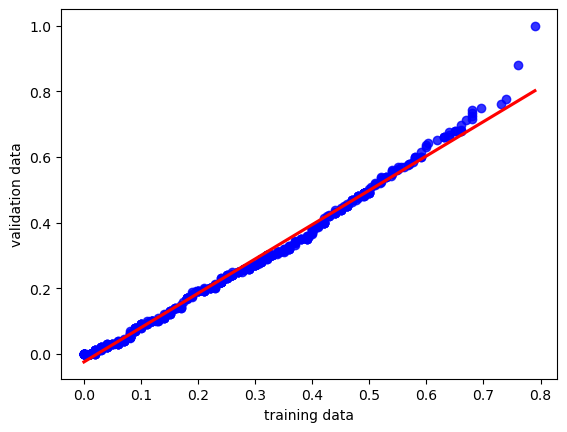

In [8]:
print('''Chart 2: Q-Q plot for training data set and validation data set for citric acid column. 
Not all data points fall on the 45 degree line.''')
my_qqplot(training['citric acid'], validation['citric acid'])

Chart 3: Q-Q plot for training data set and validation data set for density column. 
Fixed acidity values which are bigger than 13 deviate from the 45-degree line.


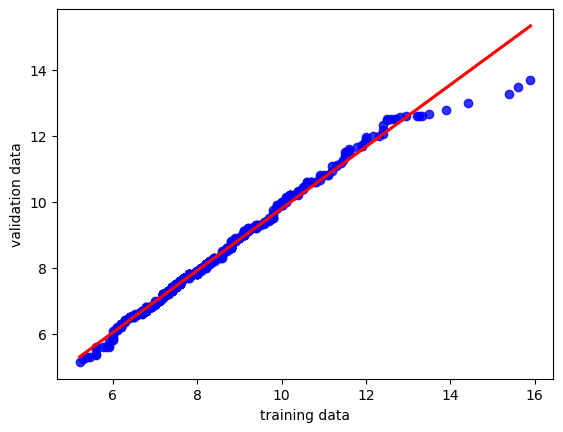

In [9]:
print('''Chart 3: Q-Q plot for training data set and validation data set for density column. 
Fixed acidity values which are bigger than 13 deviate from the 45-degree line.''')
my_qqplot(training['fixed acidity'], validation['fixed acidity'])

Chart 1, 2 and 3 show that training data set and validation set do not follow the same distribution.The outliers in pH, citric acid and fixed acidity columns were removed and Q-Q plots were redrawn. Here, uuliters are defined as data values which less than q1 - 1.5$\times$iqr and greater than q3 - 1.5$\times$iqr, where iqr = q3-q1.  

In [10]:
def get_outliers(list):
    a = np.array(list)
    q1 = np.percentile(a, 25)
    q3 = np.percentile(a, 75)
    iqr = q3 - q1
    return (q1 - (1.5*iqr), q3 + (1.5*iqr))

Chart 4: Q-Q plot for training data set and validation data set for pH value column. 
Outliers were removed. Most of the data points fall on the 45 degree line.


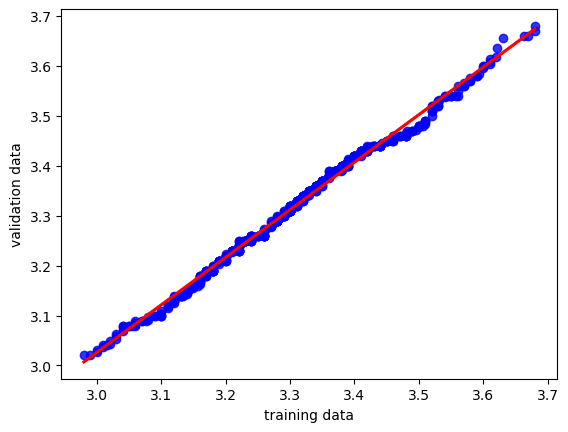

In [11]:
a, b = get_outliers(red_wine_clean.pH)
training_list = np.array(training['pH'])
training_list = training_list[(training_list>=a) &(training_list<=b)]
validation_list = np.array(validation['pH'])
validation_list = validation_list[(validation_list>=a) &(validation_list<=b)]
print('''Chart 4: Q-Q plot for training data set and validation data set for pH value column. 
Outliers were removed. Most of the data points fall on the 45 degree line.''')
my_qqplot(training_list, validation_list)

Chart 5: Q-Q plot for training data set and validation data set for citric acid value column. 
Outliers were removed. Most of the data points fall on or very close to the 45 degree line.


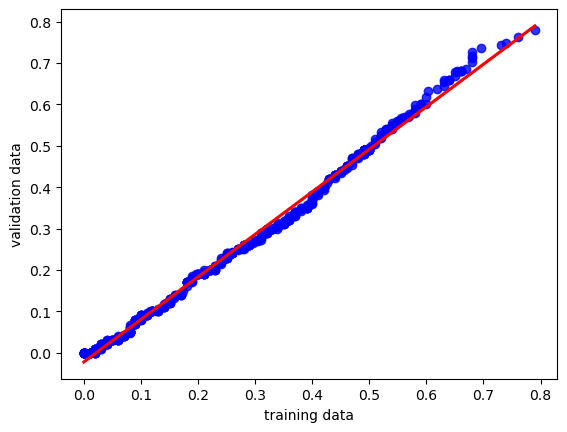

In [12]:
a, b = get_outliers(red_wine_clean['citric acid'])
training_list = np.array(training['citric acid'])
training_list = training_list[(training_list>=a) &(training_list<=b)]
validation_list = np.array(validation['citric acid'])
validation_list = validation_list[(validation_list>=a) &(validation_list<=b)]
print('''Chart 5: Q-Q plot for training data set and validation data set for citric acid value column. 
Outliers were removed. Most of the data points fall on or very close to the 45 degree line.''')
my_qqplot(training_list, validation_list)

Chart 6: Q-Q plot for training data set and validation data set for fixed acidity value column. 
Outliers were removed. Most of the data points fall on or very close to the 45 degree line.


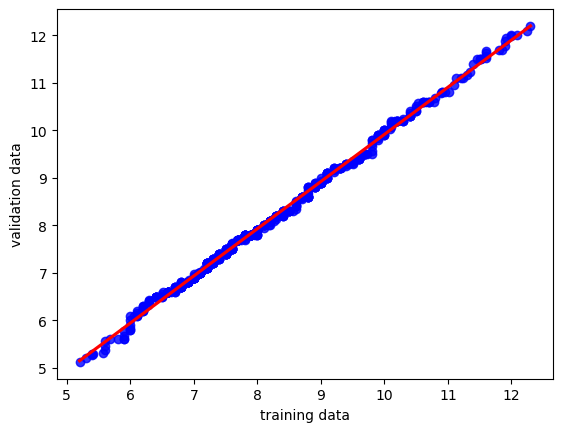

In [13]:
a, b = get_outliers(red_wine_clean['fixed acidity'])
training_list = np.array(training['fixed acidity'])
training_list = training_list[(training_list>a) &(training_list<b)]
validation_list = np.array(validation['fixed acidity'])
validation_list = validation_list[(validation_list>a) &(validation_list<b)]
print('''Chart 6: Q-Q plot for training data set and validation data set for fixed acidity value column. 
Outliers were removed. Most of the data points fall on or very close to the 45 degree line.''')
my_qqplot(training_list, validation_list)

Chart 4, 5 and 6 show that Q-Q plots for training data set and validation set which outliers were removed. In these plots, most of the data points fall on or very close to the 45 degree line. Training data set and validation set follow the same distribution. 

## Define a problem     
The goal of this project is to find which features of the red wine dataset affect the quality of red wine and if those features can be used in training models and to predict the quality of red wine.

## Descriptive analysis
### Show the histogram of some selected variables

Chart 7: Distribution of pH values of Vinho Verde red wine of 
Wine Quality Data Set. The distribution is bell-shaped. The mean pH value 
is about 3.3.


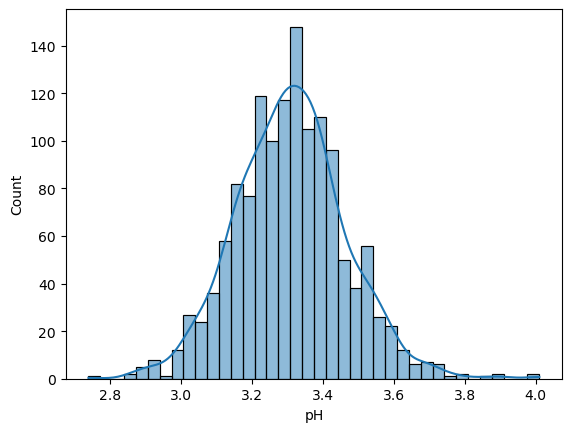

In [14]:
# pH
red_wine_df = red_wine_clean.copy()
sns.histplot(data = red_wine_df, x='pH', kde=True)
print('''Chart 7: Distribution of pH values of Vinho Verde red wine of 
Wine Quality Data Set. The distribution is bell-shaped. The mean pH value 
is about 3.3.''')

Chart 7 shows the histogram and kde for pH values. The mean pH values falls about 3.3. A normal distribution curve typically follows a bell-shaped curve. The distribution of pH may be a normal distribution. 

Chart 8: Distribution of quality of Vinho Verde red wine of 
Wine Quality Data Set. The distribution is bimodal distriution. 
The quality of most red wine falls at 5, the second highest is 6, 
the third highest is 7. The worst quality grade is 3, and the best 
grade is 8. The counts for grade 3, 4, 8 are relatively small.


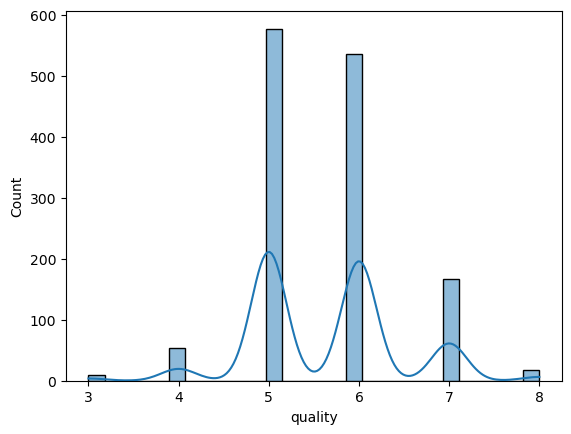

In [15]:
# Quality
sns.histplot(data = red_wine_df, x='quality', kde=True)
print('''Chart 8: Distribution of quality of Vinho Verde red wine of 
Wine Quality Data Set. The distribution is bimodal distriution. 
The quality of most red wine falls at 5, the second highest is 6, 
the third highest is 7. The worst quality grade is 3, and the best 
grade is 8. The counts for grade 3, 4, 8 are relatively small.''')

Chart 8 shows the quality of Vinho Verde red wind. 681 observations fall quality 5, 638 observations with qualtiy 6, 199 obervastions with quality 7 and quality 4, 8 and 3 have total 81 observations. 

In [16]:
red_wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Chart 9: Distribution of resiual sugar of Vinho Verde red wine of 
Wine Quality Data Set. The distribution of residual sugar is right-skewed 
distribution.


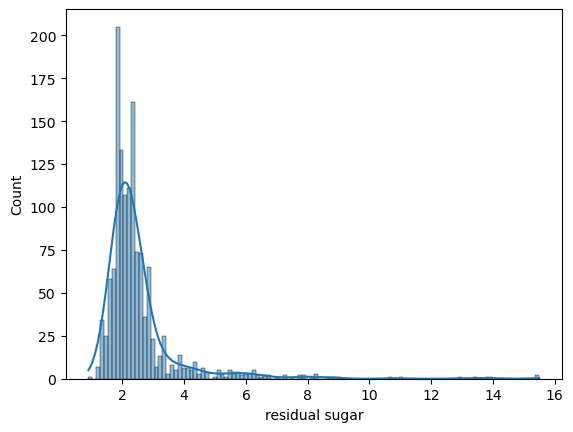

In [17]:
# Resiudal sugar
sns.histplot(data = red_wine_df, x='residual sugar', kde=True)
print('''Chart 9: Distribution of resiual sugar of Vinho Verde red wine of 
Wine Quality Data Set. The distribution of residual sugar is right-skewed 
distribution.''')

Chart 10: Distribution of sweetness of Vinho Verde red wine of 
Wine Quality Data Set. The residual sugar in the red wine dataset were 
separated in to different ranges. Residual sugar ranges from 0 to 5 are 
categorized as dry, 5 to 15 as off-dry, 15 to 45 as medium, and more than 
45 as sweet. The red wind with sweetness dry is accounted for about 95% 
of the overall proportion.


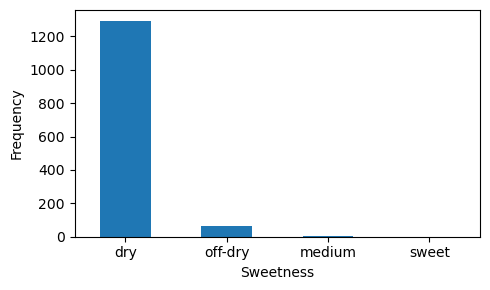

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
red_wine_df['sweetness'] = pd.cut(red_wine_df['residual sugar'], bins = [0, 5, 15, 45, 120], 
                         labels=["dry", "off-dry", "medium", "sweet"]) # [2]
plt.figure(figsize = (5,3))
red_wine_df['sweetness'] .value_counts().plot(kind = 'bar')
plt.xticks(rotation=0)
plt.xlabel('Sweetness', fontsize = 10)
plt.ylabel('Frequency', fontsize = 10)
plt.tight_layout()
print('''Chart 10: Distribution of sweetness of Vinho Verde red wine of 
Wine Quality Data Set. The residual sugar in the red wine dataset were 
separated in to different ranges. Residual sugar ranges from 0 to 5 are 
categorized as dry, 5 to 15 as off-dry, 15 to 45 as medium, and more than 
45 as sweet. The red wind with sweetness dry is accounted for about 95% 
of the overall proportion.''')

In [19]:
red_wine_df['sweetness'].value_counts()/red_wine_df['sweetness'].size

dry        0.951435
off-dry    0.047093
medium     0.001472
sweet      0.000000
Name: sweetness, dtype: float64

Chart 9 shows the histogram for residual sugar. It can be seen from the chart that most of the data are concentrated on the left side. The standard of Just wine website was used to classify the sweetness of white wine. The residual sugar ranges from 0 to 5 were classified as dry, 5 to 15 as off-dry, 15 to 45 as medium, and more than 45 as sweet. Chart 10 shows that 95% of red wine have dry taste. 

###  Show the dependence of some selected variables
In order to know the dependence of variables, a heatmap (see Chart 11) was visualized in order to show the pairwise correlation of all columns in the red wine dataset.  

Chart 11: A heatmap which shows correlation for all variables in the wine data set.
The red color represents positive correlation, while the blue color represents negative 
correlation. The darker the color, the higher the correlation.


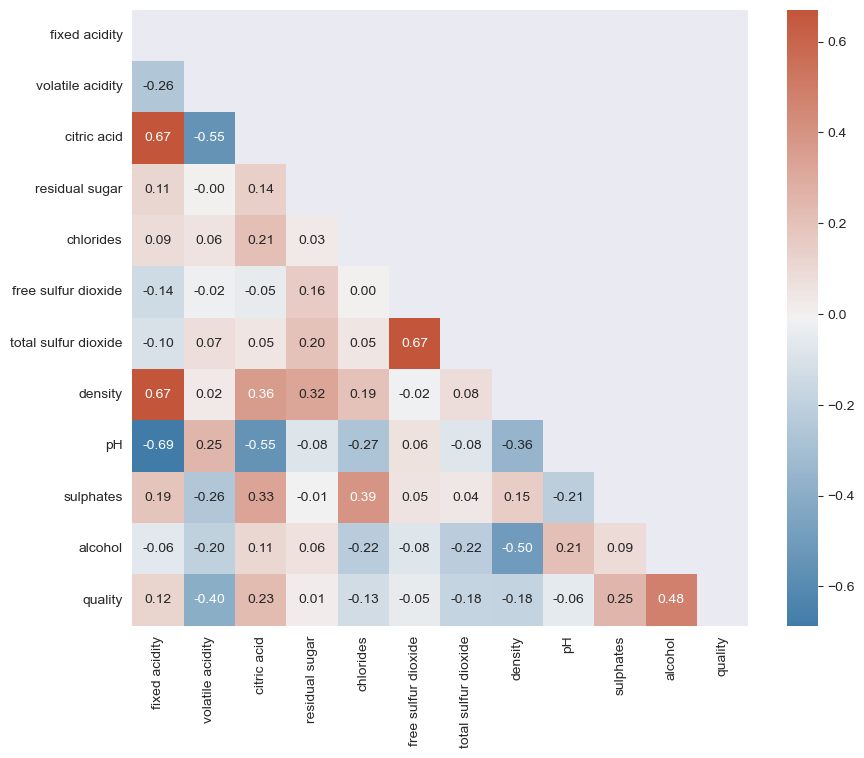

In [20]:
sns.set_style("dark")
plt.figure(figsize=(10, 8))
colunm = red_wine_df.columns.tolist()[:11] + ['quality']
mcorr = red_wine_df[colunm].corr()
mask = np.zeros_like(mcorr)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(240, 20, as_cmap=True)
g = sns.heatmap(mcorr, mask=mask, cmap=cmap, square=True, annot=True, fmt='0.2f')
print('''Chart 11: A heatmap which shows correlation for all variables in the wine data set.
The red color represents positive correlation, while the blue color represents negative 
correlation. The darker the color, the higher the correlation.''')
plt.show()

Chart 11 shows that the four most important feature affecting the quality of red wine are alcohol (positive correlation), volatile acidity (negative correlation), sulfurates (positive correlation) and citric acid (positive correlation). In addition to the characteristics affecting quality, scatterplots are used to show the correlation of other variables. 

Chart 12 : Scatter plot with a linear regression model fit for 
density and fixed acidity. Density increases with fixed acidity.


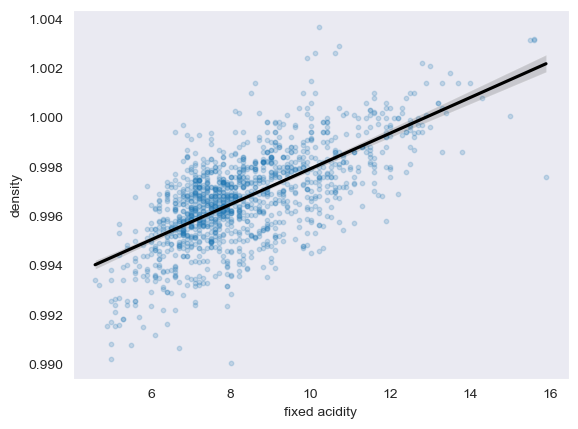

In [21]:
sns.regplot(x = 'fixed acidity', y = 'density', data = red_wine_df,\
            scatter_kws = {'s':10, 'alpha': 0.2}, line_kws={'color':'black'}, ci=95)
print('''Chart 12 : Scatter plot with a linear regression model fit for 
density and fixed acidity. Density increases with fixed acidity.''')

Chart 12 shows that fixed acidity and density have positive correlation. 

Chart 13 : Scatter plot with a linear regression model fit for 
pH value and volatile acidity. pH value increases with volatile acidity.


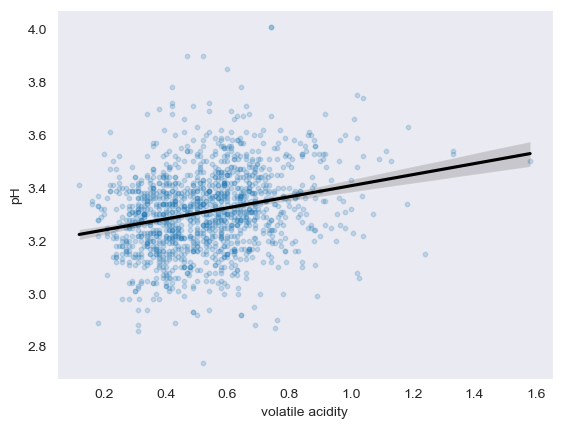

In [22]:
sns.regplot(x = 'volatile acidity', y = 'pH', data = red_wine_df,\
            scatter_kws = {'s':10, 'alpha': 0.2}, line_kws={'color':'black'}, ci=95)
print('''Chart 13 : Scatter plot with a linear regression model fit for 
pH value and volatile acidity. pH value increases with volatile acidity.''')

Chart 13 shows that fixed acidity and pH value have positive correlation. 

Chart 14: Scatter plot with a linear regression model fit 
for density and alcohol. Alcohol value decreases with density.


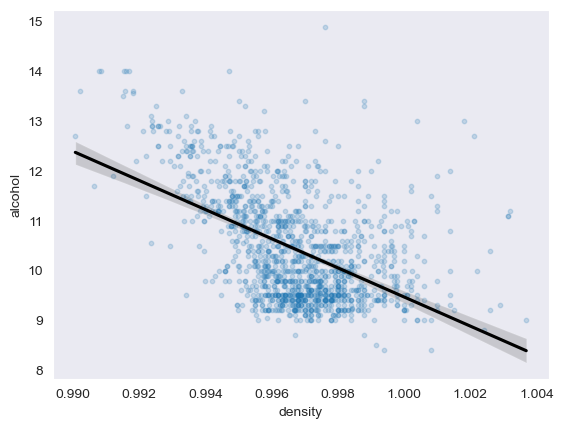

In [23]:
sns.regplot(x = 'density', y = 'alcohol', data = red_wine_df, scatter_kws = {'s':10, 'alpha': 0.2}, line_kws={'color':'black'}, ci=95)
print('''Chart 14: Scatter plot with a linear regression model fit 
for density and alcohol. Alcohol value decreases with density.''')

Chart 14 shows that alcohol and density have negative correlation.

Chart 15: Box and whisker plots of fixed acidity, volatile acidity, 
citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, 
density, pH, sulphates, alcohol for different red wine qualities. Good quality 
red wine has lower volatile acidity, but higher citric acid, sulfates and alcohol 
content. Other features are not highly correlated with the quality of red wine.


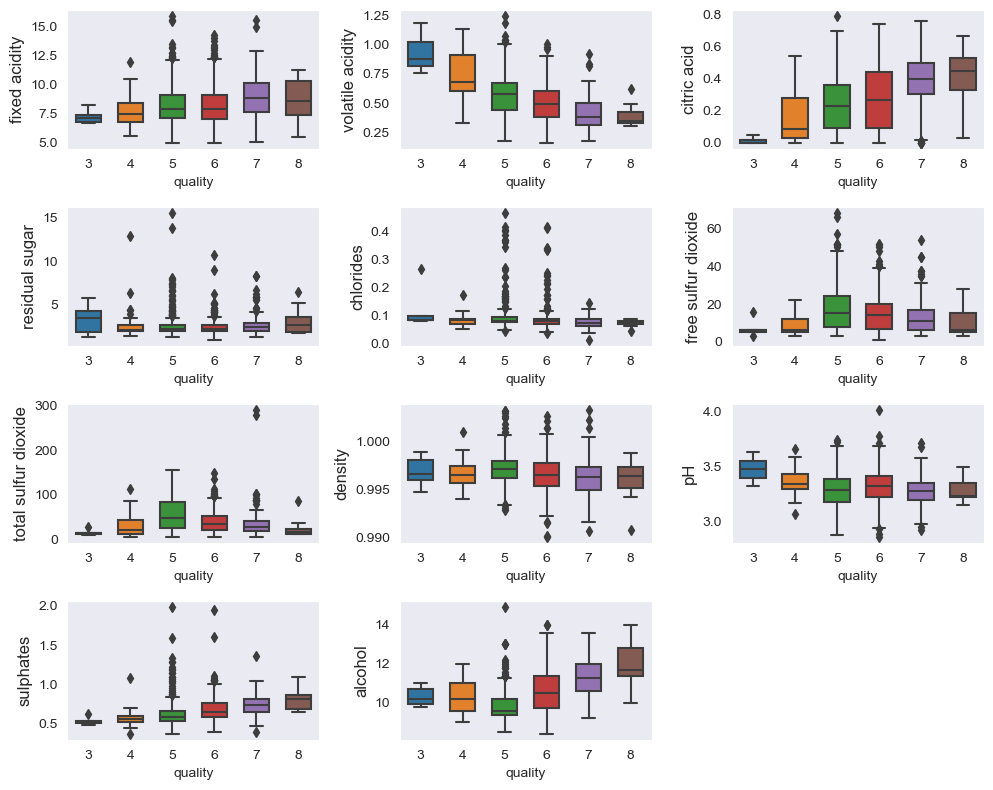

In [24]:
colunm = red_wine_df.columns.tolist()[:11]
plt.figure(figsize=(10, 8))
for i in range(11):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(x='quality', y=colunm[i],data=training, width=0.6)
    plt.ylabel(colunm[i], fontsize=12)
plt.tight_layout()
print('''Chart 15: Box and whisker plots of fixed acidity, volatile acidity, 
citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, 
density, pH, sulphates, alcohol for different red wine qualities. Good quality 
red wine has lower volatile acidity, but higher citric acid, sulfates and alcohol 
content. Other features are not highly correlated with the quality of red wine.''')
plt.show()


We used boxplots to visualize the relationship between 11 features and red wine quality (see Chart 15). Red wine with good quality has lower volatile acidity, but higher citric acid, sulfates and alcohol content. Other features are not highly correlated with the quality of red wine. According to the box plots, we can also see that red wine with not good quality (quality level equal to 3) has a relatively higher residual sugar and pH value.

### Describe the data using its range, sample mean, sample standard deviation and some quantiles.

In [25]:
statistic = red_wine_df[red_wine_df.columns[:12]].describe()
statistic.loc['range'] = statistic.loc['max'] - statistic.loc['min']  
print(statistic.loc[['range', 'mean', 'std', '25%', '50%', '75%']])

       fixed acidity  volatile acidity  citric acid  residual sugar  \
range      11.300000          1.460000     1.000000       14.600000   
mean        8.310596          0.529478     0.272333        2.523400   
std         1.736990          0.183031     0.195537        1.352314   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.430000        2.600000   

       chlorides  free sulfur dioxide  total sulfur dioxide   density  \
range   0.599000            71.000000            283.000000  0.013620   
mean    0.088124            15.893304             46.825975  0.996709   
std     0.049377            10.447270             33.408946  0.001869   
25%     0.070000             7.000000             22.000000  0.995600   
50%     0.079000            14.000000             38.000000  0.996700   
75%     0.091000            21.000000             63.000000  0.9

The variables of density and pH value look like normal distribution (mean and median are very close), and other variables (excluding quality) look like left skewed distribution (mean > median). The density of red wine is very close to that of water. 

### Choose a visualization method to explore the data set

Scatter plot displays all the data in the form of points on a rectangular coordinate system to show the degree of interaction between variables. By observing the distribution of data points on a scatterplot, correlations between variables can be inferred. If there is no correlation between the variables, it will appear as discrete points randomly distributed on the scatterplot. If there is a certain correlation, then most of the data points will be relatively concentrated and present in a certain trend. A histogram is a graph used to represent the frequency distribution of several data points for a variable. A histogram typically categorizes data into various "bins" or "range groups" and counts the number of data points belonging to each bin. In order to explore the data set, we can use both scatter plot and histogram to observe the correlation of paired variables and the distribution of every single variable. The pairplot function from seaborn was used to plot pairwise relationships in a dataset. 

Chart 16: Pairplot for all variables in the red wine dataset.
The diagonal shows the histograms for all variables. The lower matrix 
contains scatterplots for paired variables.


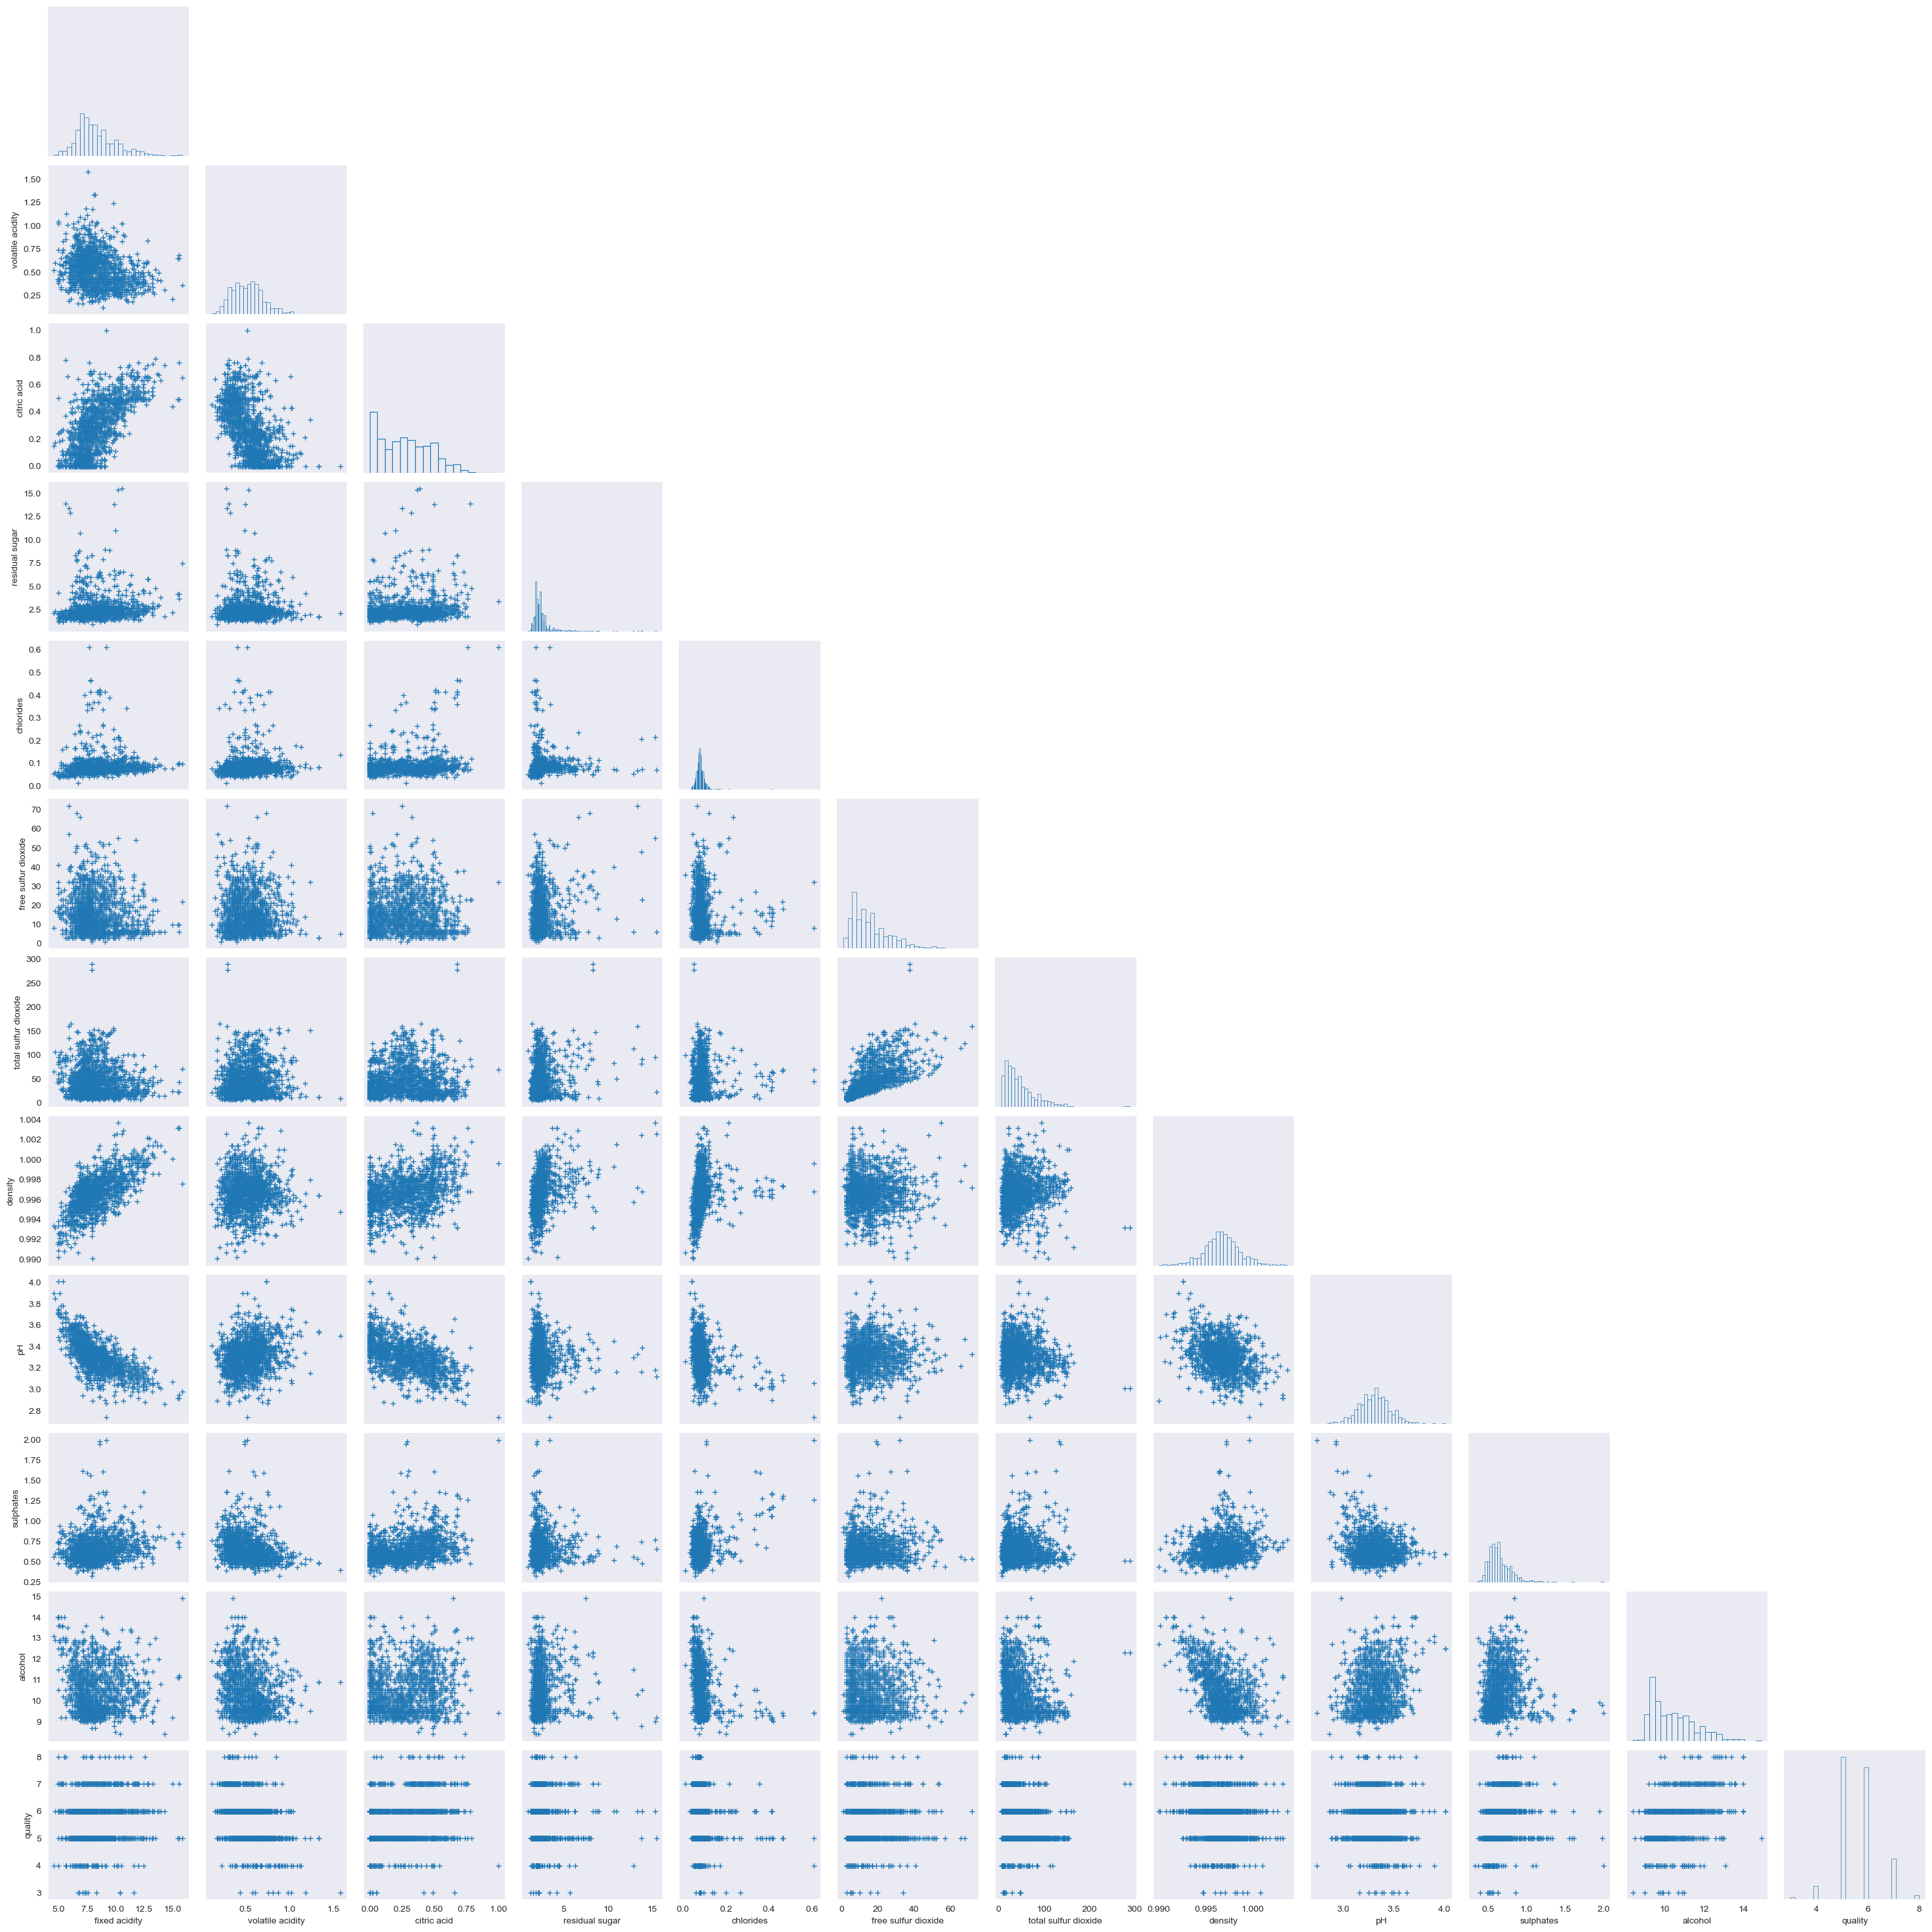

In [26]:
print('''Chart 16: Pairplot for all variables in the red wine dataset.
The diagonal shows the histograms for all variables. The lower matrix 
contains scatterplots for paired variables.''')
sns.pairplot(red_wine_clean, corner = True,
             plot_kws=dict(marker="+", linewidth=1),
             diag_kws=dict(fill=False),)

We choose to visualize the histogram of pH value and residual sugar, because we want to know how most of the tastes (acidity and sweetness) of red wines are. In order to decide how to classify the quality of red wine into good and not good in the following analysis, a histogram of red wine quality is needed. Because we want to know what features will affect the quality of red wine, so a heatmap and boxplots were used to help us to understand the data set. Heatmap shows four most important features affecting the quality of red wine are alcohol, volatile acidity, sulfates and citric acid. What are the relationships between these four features and other features? From one of the scatter plots, we can see the alcohol content is inversely proportional to the density. Another scatter plot shows the volatile acidity is proportional to the pH. In fact, the correlation between the paired variables can be read from the heatmap. But the data visualization gives us more direct intuition.

## Probability distribution
### Describe some seleted variables
Before we checked the probability distribution for variables, we removed outliers. 

Chart 17: A Q-Q plot of variable pH versus a normal distribution. 
The data points at both ends deviate from the 45-degree line.


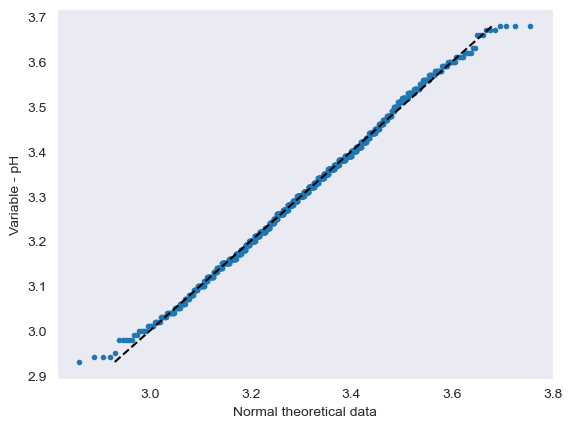

In [27]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt
def my_own_qqplot(data, distr):
    n = len(data)  
    quantiles = [ distr.ppf(i / n, np.mean(data), np.std(data)) for i in range(0, n) ]
    plt.plot(quantiles, sorted(data), '.')
    x = np.linspace(data.min(), data.max())
    plt.plot(x, x, color="k", ls="--")
    plt.xlabel('Normal theoretical data')
    plt.show()

a, b = get_outliers(red_wine_clean.pH)
list_withoutoutliers = np.array(red_wine_clean['pH'])
list_withoutoutliers = list_withoutoutliers[(list_withoutoutliers>=a) &(list_withoutoutliers<=b)]
print('''Chart 17: A Q-Q plot of variable pH versus a normal distribution. 
The data points at both ends deviate from the 45-degree line.''')
plt.ylabel('Variable - pH')
my_own_qqplot(list_withoutoutliers, stats.norm)

In [28]:
print(list_withoutoutliers.mean(), list_withoutoutliers.std())

3.3072577009767086 0.1411503948484169


Because all red wines are acidic, and the histogram shows that the pH value is in a normal distribution, so use QQ-Plot to test whether the distribution is a normal distribution. Chart 17 shows that variable pH may follow normal distribution N(3.31, 0.141). The parameters in the normal distribution are population mean $\mu$ and population variance $\sigma$. We used sample mean and sample variance to estimate these parameters. Then, we perform Kolmogorov-Smirnov test to determine if varaible pH are normally distributed. 

In [29]:
from scipy.stats import kstest
test_stat = kstest(list_withoutoutliers, 'norm', \
                   args = (list_withoutoutliers.mean(), list_withoutoutliers.std()))
test_stat

KstestResult(statistic=0.023423677154005285, pvalue=0.4516098493291283)

The null hypothesis is that the two distributions are identical. Since the p-value is bigger than 0.05, we do not reject the null hypothesis. We have sufficient evidence to say that the sample data (variable pH) come from a normal distribution.

According to Chart 11, alcohol is the feature with the highest correlation with red wine quality. We are going to study if it is follows normal distribution. The parameters we need are consistent with the previous analysis. The histogram of alcohol shows that the distribution is right skewed (Chart 18). Common transformations include square root, cube root, and log were used to transform the right skewed distribution to normal distribution. However, the attemps were not successful. QQ-plot were used to study if variable alcohol follows chi, chi-square, gamma and so on distribution. We can only say that distribution of alcohol is skewed distributed. 

Chart 18: A histogram of alcohol which outliers were removed. 
Data skewed to the right.


<AxesSubplot:ylabel='Count'>

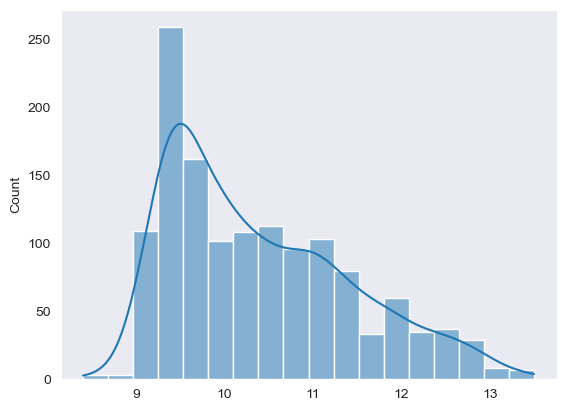

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)
a, b = get_outliers(red_wine_clean['alcohol'])
list_withoutoutliers = np.array(red_wine_clean['alcohol'])
list_withoutoutliers = list_withoutoutliers[(list_withoutoutliers>=a) &(list_withoutoutliers<=b)]
print('''Chart 18: A histogram of alcohol which outliers were removed. 
Data skewed to the right.''')
sns.histplot(data = list_withoutoutliers, kde=True)

Chart 18: A Q-Q plot of variable alcohol versus a chi distribution. 
Alcohol does not follow chi distribution.


((array([0.07194417, 0.1026369 , 0.12375646, ..., 3.69609862, 3.82416207,
         4.05590039]),
  array([ 8.4,  8.4,  8.5, ..., 13.4, 13.4, 13.5])),
 (1.5380882192295033, 8.196214526130987, 0.9882218406240374))

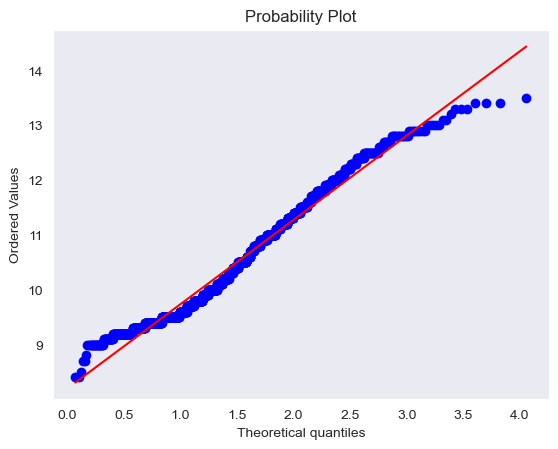

In [54]:
print('''Chart 18: A Q-Q plot of variable alcohol versus a chi distribution. 
Alcohol does not follow chi distribution.''')
stats.probplot(list_withoutoutliers, dist = stats.chi, sparams=(2.5,), plot=plt)


### Hypothesis testing
According to our previous analysis, we know that the quality of red wine is related to alcohol, sulphates, volatile acidity and citric acid. We divided the quality of red wine into two levels. Quality below 5 (including 5) is not good, while above 5 is good.

In [32]:
red_wine_df['good_red_wine'] = red_wine_df.quality.apply(lambda x: 1 if x >=6 else 0)

First, we implement two-samples t-test in order to know if alcohol concentration in good and not good red wine. The t-test is a statistical method for checking the mean of the population. When the sample numbers of the two groups of samples in the data are relatively large (usually the samples with the number of samples ≧ 30 can be regarded as the large number of samples). This method can be used to test whether the difference of mean of two groups of samples is greater than, less than, or equal to a certain value. The steps to execute the two sample t-test are as follows:

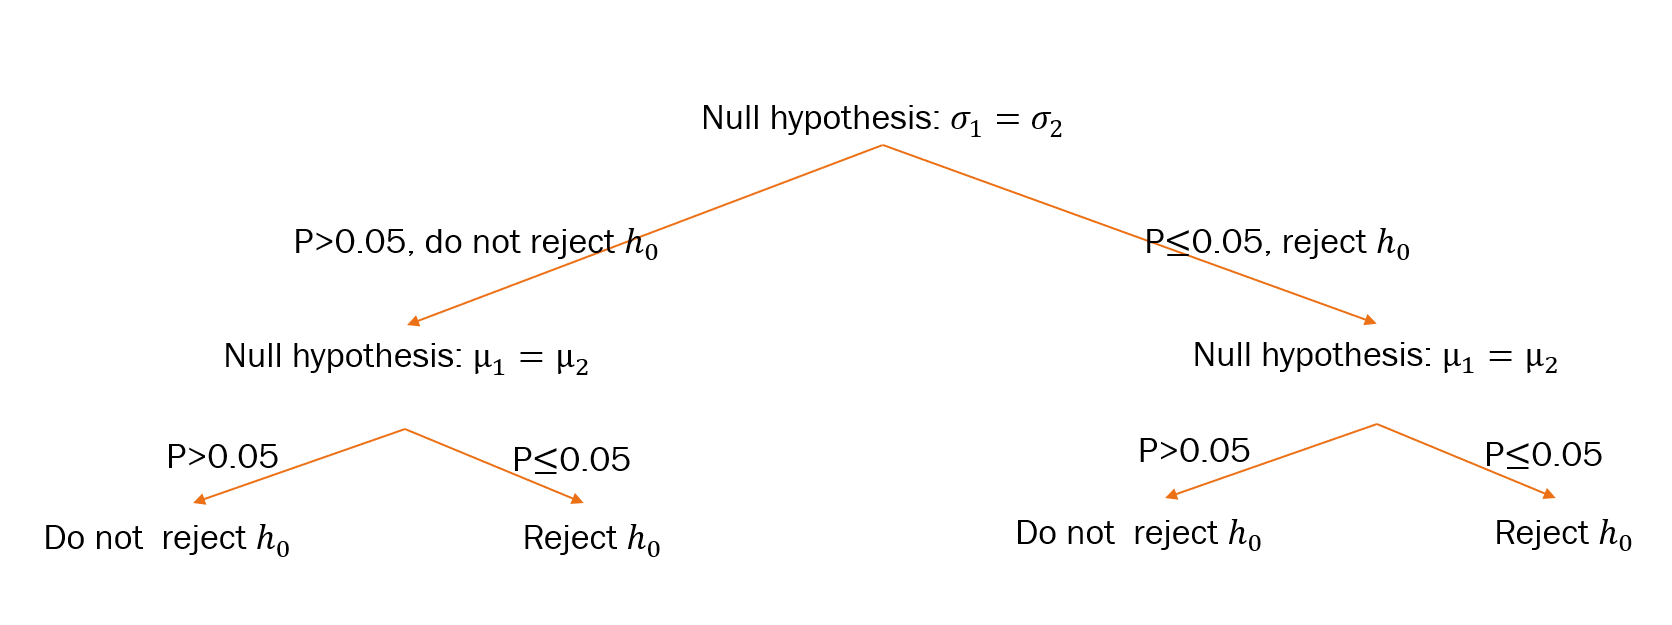

For each group, we need the sample mean ($\bar{x}$ and $\bar{y}$), sample standard deviation ($s_{X}$ and $s_{Y}$) and sample size ($N_{X}$ and $N_{Y}$).   
The degrees of freedom df = $\frac{(s_{X}^{2}/N_{X}+s_{Y}^{2}/N_{Y})^2}{(\frac{s_{X}^{2}}{N_{X}})^2/(N_{X}-1)+(\frac{s_{Y}^{2}}{N_{Y}})^2/(N_{Y}-1)}$            
We are interested in $\mu_{X}$ and $\mu_{Y}$                 
Parameter estimate: sample mean for two samples ($\bar{x}$ and $\bar{y}$)   

Null hypothesis: There is no significant difference in alcohol concentration in good and not good red wine. 

In [33]:
import scipy.stats

def t_test(df, column_name, alpha=0.05):
    group1 = np.array(df[df['good_red_wine']==0][column_name])
    group2 = np.array(df[df['good_red_wine']==1][column_name])
    # Check if group1 and group2 have same varaicne
    statistic, p = scipy.stats.levene(group1, group2, center = 'mean')
    if p > 0.05:
        # sigma1 = sigma2
        a, p_t = scipy.stats.ttest_ind(group1, group2, equal_var = True)
    else:
        # sigma2 != sigma2
        a, p_t = scipy.stats.ttest_ind(group1, group2, equal_var = False)
        
    if p_t > 0.05:
        print('''P-value is bigger than {} hence the null hypothesis cannot be rejected. 
There is no a significant between {} and quality of red wine.'''.format(alpha, column_name))
    else:
        print('''P-value is less {} hence the null hypothesis can be rejected. 
There is a significant between {} and quality of red wine.'''.format(alpha, column_name))

        
t_test(red_wine_df, 'alcohol')

P-value is less 0.05 hence the null hypothesis can be rejected. 
There is a significant between alcohol and quality of red wine.


Then, we study if there is signficant difference in sulphates, volatile acidity and citric acid in red wine quality.   
Null hypothesis: There is no significant difference in sulfates in good and not good red wine.

In [34]:
t_test(red_wine_df, 'sulphates')

P-value is less 0.05 hence the null hypothesis can be rejected. 
There is a significant between sulphates and quality of red wine.


Null hypothesis: There is no significant difference in volatile acidity in good and not good red wine.

In [35]:
t_test(red_wine_df, 'volatile acidity')

P-value is less 0.05 hence the null hypothesis can be rejected. 
There is a significant between volatile acidity and quality of red wine.


Null hypothesis: There is no significant difference in citric acid in good and not red wine.

In [36]:
t_test(red_wine_df, 'citric acid')

P-value is less 0.05 hence the null hypothesis can be rejected. 
There is a significant between citric acid and quality of red wine.


We continue to perform two-samples t-test in order to know if there are significant difference in other features in good and not good red wine.

In [37]:
list = ['fixed acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH']
for i in list:
    t_test(red_wine_df, i)
    print('')

P-value is less 0.05 hence the null hypothesis can be rejected. 
There is a significant between fixed acidity and quality of red wine.

P-value is bigger than 0.05 hence the null hypothesis cannot be rejected. 
There is no a significant between residual sugar and quality of red wine.

P-value is less 0.05 hence the null hypothesis can be rejected. 
There is a significant between chlorides and quality of red wine.

P-value is less 0.05 hence the null hypothesis can be rejected. 
There is a significant between free sulfur dioxide and quality of red wine.

P-value is less 0.05 hence the null hypothesis can be rejected. 
There is a significant between total sulfur dioxide and quality of red wine.

P-value is bigger than 0.05 hence the null hypothesis cannot be rejected. 
There is no a significant between pH and quality of red wine.



According to the results of the two-samples t-test, except residual sugar and pH values, other features can affect the quality of red wine.

## Predictive analysis

- What is the name of the model?          
    Two models were selected. One is K-Nearest Neighbors, the other is Gaussian Naïve Bayes. 
    
- What is the mathematical expression of the model?         
    - KNN: KNN classifies a data point by looking at the nearest neighbor. 
        Suppose P1 is the point which we want to predict its label.
        - 1st: Calculate distances in order to find the k nearest neighbors to P1.
        - 2nd: Classify P1 by majority vote of k nearest neighbors.
        The distance measures can be Euclidean distance, Hamming distance, Manhattan distance and Minkowski distance.
    - GNB:        
        $\hat{y}=\displaystyle \arg max_{ c\in label_1, label_2}P(c)\prod_{i=1}^{d}f_{i}(x_{i}|c)$                      
        where P(c) is the prior and $\prod_{i=1}^{d}f_{i}(x_{i}|c)$ is the likelihood under the assumptions and     
        $f_{i}(x_{i}|c) = \frac{1}{\sqrt{2\pi\sigma_{c,i}^{2}}}e^{-\frac{(x_{j}-\mu_{c,j})^2}{2\sigma_{c,i}^{2}}}$
- What are the hyperparameters?
    - KNN: The number of neighbors
    - GNB: Smoothing
- What are the parameters? 
    - KNN: The number of neighbors
    - GNB: P(c) (prior),  $\mu_{c,i}$, $\sigma_{c,i}$ in likelihood $f_{i}(x_{i}|c)$ for all variable i and all class c.
- A short description of how to estimate the parameters?
    - KNN: We visualize the plot between accuracy and K values to find the best K. 
    - GNB: The parameters ($\mu_{c,i}$, $\sigma_{c,i}$) are estimated by using maximum likelihood. 

Six models are going to perform in the following analysis:
- Model 1: KNN trained with all features in red wine data set.          
- Model 2: GNB trained with all features in red wine data set.             
- Model 3: KNN trained with 9 features which were selected by two sample t-test in red wine data set.
- Model 4: GNB trained with 9 features which were selected by two sample t-test in red wine data set.
- Model 5: KNN trained with 4 most influential features which were selected by using heatmap in red wine data set.
- Model 6: GNB trained with 4 most influential features which were selected by using heatmap in red wine data set.

#### Model 1: KNN trained with all features in red wine data set.

In [38]:
# knn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate 
from sklearn.model_selection import cross_val_score

X = np.array(red_wine_df.iloc[:, 0:11])
y = np.array(red_wine_df.good_red_wine)
# Split data
X_Train, X_Test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=2)
X_train = X_Train[:,0:11]
X_test = X_Test[:, 0:11]


In [39]:
# Normalize data
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# choices best k
ks = range(3,199, 2)
SampleScores = []
cvScores = []
k_value = []


for k in ks:
    knn_cv = KNeighborsClassifier(k).fit(X_train, y_train)
    SampleScores.append(knn_cv.score(X_train, y_train))
    cv_score = cross_val_score(knn_cv, X_train, y_train, cv = 5)
    cvScores.append(np.mean(cv_score))
    k_value.append(k)

Chart 19: Accuracy plot for training and validation dataset for
KNN model trained with all features in red wine data set. The best k value
is 155 and gives best accuracy 0.736.


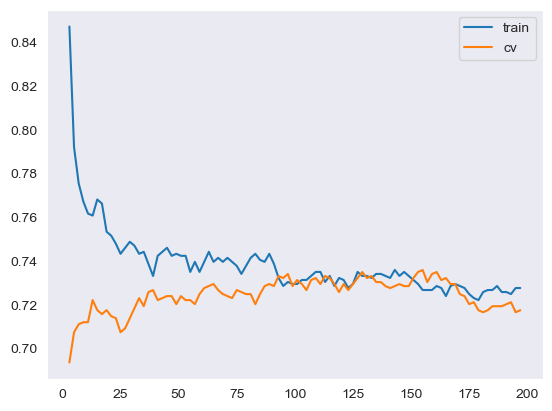

In [40]:
import matplotlib.pyplot as plt
p1 = plt.plot(ks, SampleScores)
p2 = plt.plot(ks, cvScores)
plt.legend(["train", "cv"])
print('''Chart 19: Accuracy plot for training and validation dataset for
KNN model trained with all features in red wine data set. The best k value
is 155 and gives best accuracy 0.736.''')
plt.show()  

In [41]:
best_k = k_value[cvScores.index(max(cvScores))]
best_accuracy = max(cvScores)
print('Best k_value:{} and best accuracy:{}'.format(best_k, best_accuracy))

Best k_value:155 and best accuracy:0.7359235614932568


In [42]:
best_KNN = KNeighborsClassifier(best_k).fit(X_train, y_train)
y_test_pred = best_KNN.predict(X_test)
print ('Accuracy for testing set: {}%'.format(round(best_KNN.score(X_test, y_test)*100, 2)))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

Accuracy for testing set: 76.1%
              precision    recall  f1-score   support

           0       0.77      0.73      0.75       131
           1       0.76      0.79      0.78       141

    accuracy                           0.76       272
   macro avg       0.76      0.76      0.76       272
weighted avg       0.76      0.76      0.76       272



#### Model 2: GNB trained with all features in red wine data set.

In [43]:
# Gassian Naive Bayes
from sklearn.naive_bayes import GaussianNB
steps = [1e-11, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
for step in steps:
    gnb = GaussianNB()
    gnb.set_params(var_smoothing = step)
    cv_score = cross_val_score(gnb, X_train, y_train, cv = 5)
    print(step, ':', cv_score.mean())

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_test_pred = gnb.predict(X_test)
print('***Predict test dataset***')
print(classification_report(y_test, y_test_pred))

1e-11 : 0.7221494102228048
1e-08 : 0.7221494102228048
1e-07 : 0.7221494102228048
1e-06 : 0.7221494102228048
1e-05 : 0.7221494102228048
0.0001 : 0.7221494102228048
0.001 : 0.7221494102228048
***Predict test dataset***
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       131
           1       0.76      0.76      0.76       141

    accuracy                           0.75       272
   macro avg       0.75      0.75      0.75       272
weighted avg       0.75      0.75      0.75       272



#### Model 3: KNN trained with 9 features which were selected by two sample t-test in red wine data set.

In [44]:
# knn
X_train = X_Train[:, [0,1,2,4,5,6,7,9,10]]
X_test = X_Test[:, [0,1,2,4,5,6,7,9,10]]
# Normalize data
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# choices best k
ks = range(3,199, 2)
SampleScores = []
cvScores = []
k_value = []


for k in ks:
    knn_cv = KNeighborsClassifier(k).fit(X_train, y_train)
    SampleScores.append(knn_cv.score(X_train, y_train))
    cv_score = cross_val_score(knn_cv, X_train, y_train, cv = 5)
    cvScores.append(np.mean(cv_score))
    k_value.append(k)


Chart 20: Accuracy plot for training and validation dataset for
KNN model trained with 9 features which were selected by two sample t-test.
The best k value is 69 and gives best accuracy 0.741.


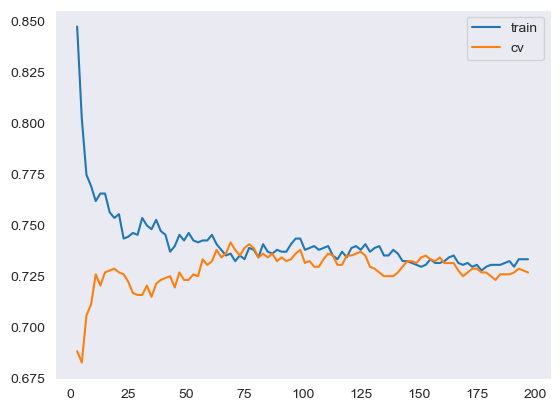

In [45]:
p1 = plt.plot(ks, SampleScores)
p2 = plt.plot(ks, cvScores)
plt.legend(["train", "cv"])
print('''Chart 20: Accuracy plot for training and validation dataset for
KNN model trained with 9 features which were selected by two sample t-test.
The best k value is 69 and gives best accuracy 0.741.''')
plt.show()  

In [46]:
best_k = k_value[cvScores.index(max(cvScores))]
best_accuracy = max(cvScores)
print('Best k_value:{} and best accuracy:{}'.format(best_k, best_accuracy))

Best k_value:69 and best accuracy:0.7414704265843655


In [47]:
best_KNN = KNeighborsClassifier(best_k).fit(X_train, y_train)
y_test_pred = best_KNN.predict(X_test)
print ('Accuracy for testing set: {}%'.format(round(best_KNN.score(X_test, y_test)*100, 2)))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

Accuracy for testing set: 75.74%
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       131
           1       0.75      0.79      0.77       141

    accuracy                           0.76       272
   macro avg       0.76      0.76      0.76       272
weighted avg       0.76      0.76      0.76       272



#### Model 4: GNB trained with 9 features which were selected by two sample t-test in red wine data set.

In [48]:
steps = [1e-11, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
for step in steps:
    gnb = GaussianNB()
    gnb.set_params(var_smoothing = step)
    cv_score = cross_val_score(gnb, X_train, y_train, cv = 5)
    print(step, ':', cv_score.mean())

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_test_pred = gnb.predict(X_test)
print('***Predict test dataset***')
print(classification_report(y_test, y_test_pred))    

1e-11 : 0.7258275905804761
1e-08 : 0.7258275905804761
1e-07 : 0.7258275905804761
1e-06 : 0.7258275905804761
1e-05 : 0.7258275905804761
0.0001 : 0.7258275905804761
0.001 : 0.7258275905804761
***Predict test dataset***
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       131
           1       0.75      0.77      0.76       141

    accuracy                           0.75       272
   macro avg       0.75      0.75      0.75       272
weighted avg       0.75      0.75      0.75       272



#### Model 5: KNN trained with 4 most influential features which were selected by using heatmap in red wine data set.

In [49]:
# knn
X_train = X_Train[:, [1,2,9,10]]
X_test = X_Test[:, [1,2,9,10]]
# Normalize data
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# choices best k
ks = range(3,199, 2)
SampleScores = []
cvScores = []
k_value = []


for k in ks:
    knn_cv = KNeighborsClassifier(k).fit(X_train, y_train)
    SampleScores.append(knn_cv.score(X_train, y_train))
    cv_score = cross_val_score(knn_cv, X_train, y_train, cv = 5)
    cvScores.append(np.mean(cv_score))
    k_value.append(k)

Chart 21: Accuracy plot for training and validation dataset for
KNN model trained with 4 most influential features which were selected by 
using heatmap. The best k value is 37 and gives best accuracy 0.734.


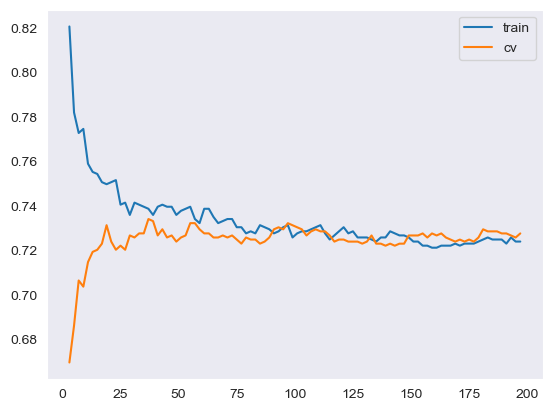

In [50]:
p1 = plt.plot(ks, SampleScores)
p2 = plt.plot(ks, cvScores)
plt.legend(["train", "cv"])
print('''Chart 21: Accuracy plot for training and validation dataset for
KNN model trained with 4 most influential features which were selected by 
using heatmap. The best k value is 37 and gives best accuracy 0.734.''')
plt.show()  

In [51]:
best_k = k_value[cvScores.index(max(cvScores))]
best_accuracy = max(cvScores)
print('Best k_value:{} and best accuracy:{}'.format(best_k, best_accuracy))

Best k_value:37 and best accuracy:0.7341267492495667


In [52]:
best_KNN = KNeighborsClassifier(best_k).fit(X_train, y_train)
y_test_pred = best_KNN.predict(X_test)
print ('Accuracy for testing set: {}%'.format(round(best_KNN.score(X_test, y_test)*100, 2)))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

Accuracy for testing set: 75.37%
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       131
           1       0.77      0.75      0.76       141

    accuracy                           0.75       272
   macro avg       0.75      0.75      0.75       272
weighted avg       0.75      0.75      0.75       272



#### Model 6: GNB trained with 4 most influential features which were selected by using heatmap in red wine data set.

In [53]:
steps = [1e-11, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
for step in steps:
    gnb = GaussianNB()
    gnb.set_params(var_smoothing = step)
    cv_score = cross_val_score(gnb, X_train, y_train, cv = 5)
    print(step, ':', cv_score.mean())

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_test_pred = gnb.predict(X_test)
print('***Predict test dataset***')
print(classification_report(y_test, y_test_pred))

1e-11 : 0.7212404346171732
1e-08 : 0.7212404346171732
1e-07 : 0.7212404346171732
1e-06 : 0.7212404346171732
1e-05 : 0.7212404346171732
0.0001 : 0.7212404346171732
0.001 : 0.7212404346171732
***Predict test dataset***
              precision    recall  f1-score   support

           0       0.74      0.79      0.76       131
           1       0.79      0.74      0.77       141

    accuracy                           0.76       272
   macro avg       0.77      0.77      0.76       272
weighted avg       0.77      0.76      0.76       272



- Evaluate their performance. Which one do you prefer and why?             
    Theoretically, all machine learning methods have the problem of dimensionality. If the the sample have too many dimensions, it will have problems such as sparse data points and diffciulty of distance calculations. For this case, dimensionality reduction is needed. The easiest way to keep the distance between data points constant in a low-dimensional space is to perform a linear transformation on the original high-dimensional space. In the KNN model training, we reduced all features to 9 (selected by two sample t-test), and then reduced to 4 (the 4 most influential features in Heatmap). The difference in best accuracy for 5-fold cross validation is not significant in these trained KNN models. It is the same for Gassian Naive Bayes models. However,the KNN model which trained with 9 features has no overfitting and underfitting problems when it is used to predict the test dataset. In other words, the best accuracy for cross vaildation is closed to the accuracy for predicting test dataset. However, expect model 3, the accuracy of predicting test dataset is slightly higher than the best accuracy for cross vaildation. 
    For the above reasons, we prefer KNN model which trained by 9 features which were selected by two sample t-test. 

- Run the algorithm you prefer on the test data set and draw a conclusion.     
    We used 5-folds cross validation and k = 3, 5, 7, ..., 199 in KNeighborsClassifier to find the best k which gave the highest accuracy. Then use the best k as hyperparameter in the KNN model which we prefer to run the algorithm on the test data set. The accuracy in the test data set is similar to the highest accuracy obtained from validation dataset. It seems like the model is not overfitting or underfitting.
    
# Conclusion
The goal of this project is to find which features of the red wine dataset affect the quality of red wine and if those features can be used in training models and to predict the quality of red wine. Two sample t-test was used to find the features which affect the red wine quality. 

According to our study, 9 following features affect the quality of red wine are
- fixed acidity
- volatile acidity
- citric acid
- chlorides 
- free sulfur dioxide
- total sulfur dioxide 
- density
- sulphates
- alcohol 

KNN and Gassian Naive Bayes trained by different features were used to predict the red wine quality. The KNN model which trained with 9 features selected by two sample t-test has no overfitting and underfitting problems when it is used to predict the test dataset. The accuracy of predicting test dataset is about 75%. 

If we keep working on this project, we would like to study how to reduce dimensionality to find the best combination of features for training model and predicting red wine quality. 

# Reflection
The red wine database is mainly related to Vinho Verde (green wine). The target user may be the producer of Vinho Verde or the Vinho Verde wine importer. However, whether the established model can be applied to all red wines still needs further research. According to the current results, we cannot say this model is good enough. We only divided red wine quality into two categories when we do predict. Moreover, neither of the two prediction models we used can give an accuracy of more than 80%. A good prediction should be able to predict the different quality levels and the accuracy should be more than 90%. If we can collect more data, we hope to collect the sales volume and production cost of different red wine quality. Of course, the sale price for high-quality red wine is relatively high. But expensive red wine is not necessarily popular with consumers. If the target users of the model are wine producers or wine importers, they should pay more attention to the relationship between quality and sales. If we can continue to work on this project, the next step is to carry out Principal Component Analysis, build a better model with higher accuracy and test whether the model can be used to predict all types of red wine. Finally, as a medical physicist, I must give a statement of responsible drinking. The International Agency for Research on Cancer (IARC) classified alcoholic beverages as a group 1 carcinogen. Alcohol increases risk of cancer of oral cavity and pharynx, oesophagus, colorectum, liver, head and neck, larynx and female breast. 

References:            
[1] P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.               
[2] Just Wine. How much sugar is in my wine? https://justwineapp.com/article/how-much-sugar-is-in-my-wine [2022-12-20]